<a href="https://www.kaggle.com/code/hillaryjude/amazon-customer-reviews-analysis?scriptVersionId=217143951" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-customer-review/Reviews.csv


# Reading the data

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# extracting the data
df = pd.read_csv('/kaggle/input/amazon-customer-review/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.shape

(568454, 10)

In [6]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# Processing the data

In [7]:
df[df['HelpfulnessDenominator']<df['HelpfulnessNumerator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [8]:
# only these two products has its numerator value greater than its denominator. 
# Rather than removing them, I prefer to ignore them by filtering them out as an invalid row

In [9]:
valid_data = df[df['HelpfulnessDenominator']>=df['HelpfulnessNumerator']]
valid_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Removing duplicates

In [10]:
# One productid cannot review the same product at the same time with same description more than ones. Let's see if such kind exists.

valid_data.duplicated(subset = ['ProductId','UserId','Time','Text']).sum()

1205

In [11]:
valid_data[valid_data.duplicated(subset = ['ProductId','UserId','Time','Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
2336,2337,B0001FQVCK,A5D06XJHDXK75,C. Po,1,1,5,1190592000,"Baci's are pure heaven - great gift, stocking ...",My family has been in love with Baci's ever si...
2647,2648,B0016FY6H6,A2NLZ3M0OJV9NX,Mark Bodzin,0,0,2,1313107200,way too weak for my tastes,"What can i say, I love iced tea. I drink a lot..."
2653,2654,B0016FY6H6,A3I4PCBRENJNG2,L. Cain,0,0,4,1300579200,quality lightly sweetened green tea powder,lots of uses for this green tea...<br /><br />...
2946,2947,B0002TJAZK,A2ISKAWUPGGOLZ,M. S. Handley,0,1,1,1310774400,Kitty Junk Food,We have five cats - one an elderly cat of 15 y...
...,...,...,...,...,...,...,...,...,...,...
562273,562274,B004HOSGWE,A1TMAVN4CEM8U8,Gunner,1,1,5,1336348800,My 7th favorite flavor,Diamond Almonds<br />Almonds are a good source...
567958,567959,B0030VJ8YU,A2MF0C4E7GYCI,"VW ""VW""",0,0,5,1305331200,My son loves this,My son loves this food. He is 16 months now a...
568008,568009,B0030VJ8YU,ATIHDHZYNQ0EI,"Kristen O'donnell ""twinsmom""",3,3,5,1270425600,Organic and Tasty!,I have 12 month olds and no time to write a gr...
568017,568018,B0030VJ8YU,A20P8VC55KPPCT,FL Mom,2,2,5,1274486400,These pouches are great!,These pouches are so easy and convenient. They...


In [12]:
clean_data = valid_data.drop_duplicates(subset = ['ProductId','UserId','Time','Text'])
clean_data.shape

(567247, 10)

## Analysing the data types

In [13]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567247 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      567247 non-null  int64 
 1   ProductId               567247 non-null  object
 2   UserId                  567247 non-null  object
 3   ProfileName             567221 non-null  object
 4   HelpfulnessNumerator    567247 non-null  int64 
 5   HelpfulnessDenominator  567247 non-null  int64 
 6   Score                   567247 non-null  int64 
 7   Time                    567247 non-null  int64 
 8   Summary                 567220 non-null  object
 9   Text                    567247 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.6+ MB


In [14]:
# The time column is in string data type

In [15]:
pd.to_datetime(clean_data['Time'])

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 567247, dtype: datetime64[ns]

In [16]:
clean_data['time'] = pd.to_datetime(clean_data['Time'], unit = 's')
clean_data.head()

<ipython-input-16-7bc86191a702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['time'] = pd.to_datetime(clean_data['Time'], unit = 's')


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,time
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21


# Identifying active buyers to make them buy products frequently

In [17]:
#Using UserId as my unique key to find number of unique users on amazon
clean_data['UserId'].nunique()

256059

In [18]:
freq_buyers = clean_data.groupby(by = clean_data['UserId']).agg({'ProductId':'count','Score':'mean','Text':'count'}).sort_values(by = 'ProductId', ascending = False)
freq_buyers

,ProductId,Score,Text
UserId,,,
A3OXHLG6DIBRW8,442,4.529412,442
A1YUL9PCJR3JTY,412,4.490291,412
AY12DBB0U420B,389,4.647815,389
A281NPSIMI1C2R,365,4.841096,365
A1Z54EM24Y40LL,256,4.453125,256
...,...,...,...
A2HRM5D802WYYZ,1,5.000000,1
A2HRN5PLORHK6E,1,5.000000,1
A2HRNC10AGMVPC,1,5.000000,1


In [19]:
freq_buyers.columns

Index(['ProductId', 'Score', 'Text'], dtype='object')

In [20]:
freq_buyers.columns = ['Total_Products', 'Average_Rating', 'Total_Reviews']

In [21]:
freq_buyers.reset_index(inplace = True)

In [22]:
freq_buyers.index = freq_buyers.index + 1

In [23]:
top_10_buyers = freq_buyers.head(10)
top_10_buyers

,UserId,Total_Products,Average_Rating,Total_Reviews
1,A3OXHLG6DIBRW8,442,4.529412,442
2,A1YUL9PCJR3JTY,412,4.490291,412
3,AY12DBB0U420B,389,4.647815,389
4,A281NPSIMI1C2R,365,4.841096,365
5,A1Z54EM24Y40LL,256,4.453125,256
6,A2MUGFV2TDQ47K,201,3.751244,201
7,A1TMAVN4CEM8U8,181,4.812155,181
8,AQQLWCMRNDFGI,176,3.954545,176
9,A2SZLNSI5KOQJT,175,3.834286,175
10,AZV26LP92E6WU,167,4.886228,167


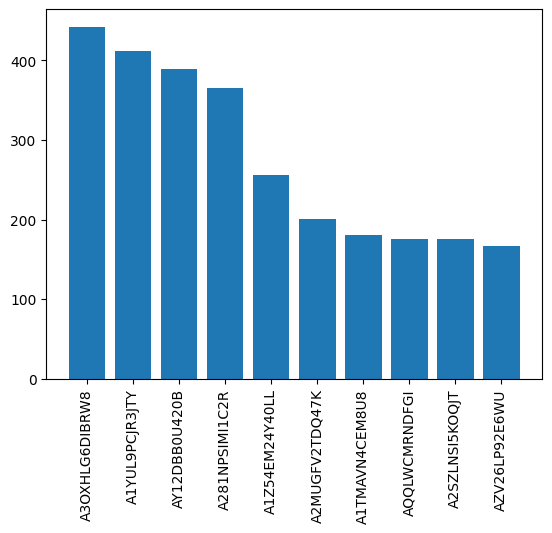

In [24]:
plt.bar(top_10_buyers['UserId'], top_10_buyers['Total_Products'])
plt.xticks(rotation = 90)
plt.show()


# Finding products with good ratings

In [25]:
highest_rated = clean_data['ProductId'].value_counts().to_frame()
highest_rated

,count
ProductId,
B007JFMH8M,913
B002QWHJOU,630
B002QWP89S,630
B002QWP8H0,630
B0026RQTGE,630
...,...
B0058FN5CM,1
B0047435DO,1
B004DSPTTM,1


In [26]:
# filtering products that have sold more than 600 items
high_prod = highest_rated[highest_rated['count']>550].index
high_prod

Index(['B007JFMH8M', 'B002QWHJOU', 'B002QWP89S', 'B002QWP8H0', 'B0026RQTGE',
       'B003B3OOPA', 'B001EO5Q64', 'B001RVFEP2', 'B0013NUGDE', 'B006HYLW32',
       'B000VK8AVK', 'B0026KNQSA', 'B007M832YY', 'B007M83302', 'B0026KPDG8',
       'B001RVFERK', 'B000KV61FC', 'B000KV7ZGQ'],
      dtype='object', name='ProductId')

In [27]:
freq_prod = clean_data[clean_data['ProductId'].isin(high_prod)]
freq_prod

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,time
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,1318896000,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,2011-10-18
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,1318550400,genuine Greenies best price,"These are genuine Greenies product, not a knoc...",2011-10-14
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,1317168000,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d...",2011-09-28
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,1316822400,dogs love greenies,"What can I say, dogs love greenies. They begg ...",2011-09-24
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,1316736000,Greenies review,This review is for a box of Greenies Lite for ...,2011-09-23
...,...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,1343520000,Yummy!,I loved these cookies and so did my kids. You ...,2012-07-29
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,1343433600,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...,2012-07-28
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,1343433600,Delicious!,These are great for a quick snack! They are sa...,2012-07-28
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,1343433600,yummy,I love the Quaker soft baked cookies. The rea...,2012-07-28


<Axes: xlabel='count', ylabel='ProductId'>

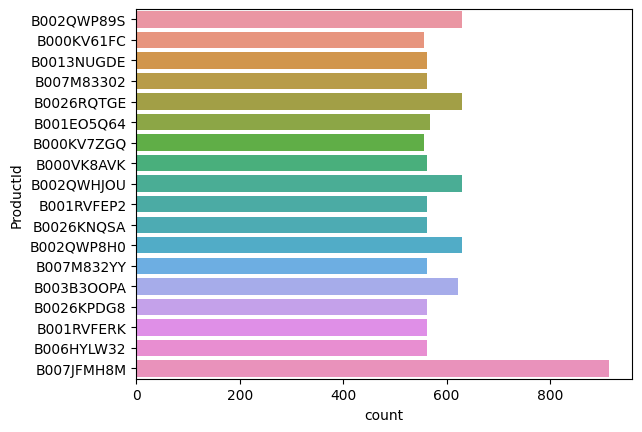

In [28]:
sns.countplot(data = freq_prod, y = 'ProductId')

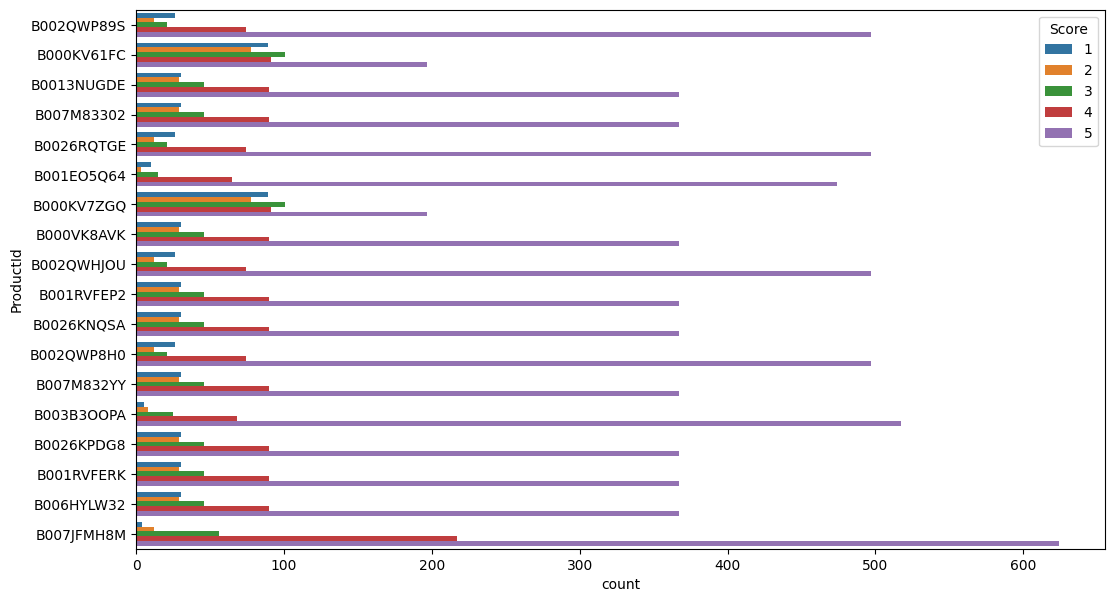

In [29]:
plt.figure(figsize = (12.5,7))
sns.countplot(data = freq_prod, y = 'ProductId', hue = 'Score')
plt.show()

# Analyzing the trend between frequent and non-frequent users

In [30]:
users = clean_data['UserId'].value_counts()
users

UserId
A3OXHLG6DIBRW8    442
A1YUL9PCJR3JTY    412
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
APKQBK5EAZ6BV       1
A31ZSRLG55BLRH      1
A2YQH34KFB65BR      1
A14AMMHQ1EA52K      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [31]:
clean_data['user_type'] = clean_data['UserId'].apply(lambda x: "Frequent" if users[x]>50 else "Non-frequent")
clean_data

<ipython-input-31-24ddd2e46b06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['user_type'] = clean_data['UserId'].apply(lambda x: "Frequent" if users[x]>50 else "Non-frequent")


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,time,user_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,Non-frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,Non-frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,Non-frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,Non-frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,Non-frequent
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,2011-03-09,Non-frequent
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,2012-03-09,Non-frequent
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012-02-21,Non-frequent
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012-03-13,Non-frequent


In [32]:
Freq_users = clean_data[clean_data['user_type']== 'Frequent']
Freq_users

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,time,user_type
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,2010-03-12,Frequent
44,45,B001EO5QW8,A2G7B7FKP2O2PU,D. Leschke,0,0,5,1209686400,Great taste and convenience,We really like the McCann's steel cut oats but...,2008-05-02,Frequent
46,47,B001EO5QW8,AQLL2R1PPR46X,grumpyrainbow,0,0,5,1192752000,good,Good oatmeal. I like the apple cinnamon the b...,2007-10-19,Frequent
109,110,B001REEG6C,AY12DBB0U420B,Gary Peterson,0,0,5,1316390400,My Idea of a Good Diet Food.,I'm presently on a diet and I was at my Fresh ...,2011-09-19,Frequent
141,142,B001GVISJW,A2YIO225BTKVPU,"Angel_Boy ""Treat the people around you the wa...",0,0,4,1301788800,Good Licorice,Twizzlers brand licorice is much better than t...,2011-04-03,Frequent
...,...,...,...,...,...,...,...,...,...,...,...,...
568261,568262,B00374ZKQ0,A2GEZJHBV92EVR,History buff,0,0,5,1345075200,Very good alternative to sugar.,I have tried many of the no sugar sweeteners o...,2012-08-16,Frequent
568317,568318,B0013Z0PTW,A1ODOGXEYECQQ8,Nuknuk,0,0,4,1226880000,Good Tasting Granola Bars,Most health bars taste awful. Fiber One Grano...,2008-11-17,Frequent
568331,568332,B001BOAOLY,A36MP37DITBU6F,"Enchanted In Dixie ""Enchanted""",6,6,4,1244419200,GREAT ORGANIC Honey flavor Hard candy. Great c...,These are delicious organic hard candies. I on...,2009-06-08,Frequent
568361,568362,B000LKVRQA,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,5,1282608000,An Earl Grey Tea That Won't Disappoint,*****<br />St. Dalfour's wonderful Certified O...,2010-08-24,Frequent


In [33]:
# Now lets find the non-frequent users 

Non_freq_users = clean_data[clean_data['user_type'] == 'Non-frequent']
Non_freq_users

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,time,user_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,Non-frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,Non-frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,Non-frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,Non-frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,Non-frequent
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,2011-03-09,Non-frequent
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,2012-03-09,Non-frequent
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012-02-21,Non-frequent
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012-03-13,Non-frequent


# Visualizing how frequent users rate product vs non-frequent users product rating

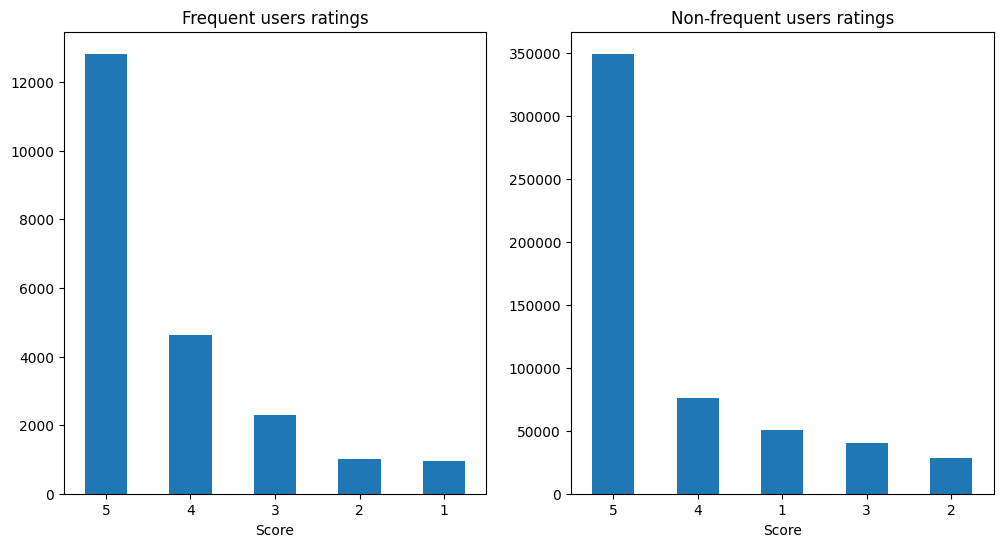

In [34]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
Freq_users['Score'].value_counts().plot(kind = 'bar')
plt.title('Frequent users ratings')
plt.xticks(rotation = 0)

plt.subplot(1,2,2)
Non_freq_users['Score'].value_counts().plot(kind = 'bar')
plt.title('Non-frequent users ratings')
plt.xticks(rotation = 0)
plt.show()

We can infer from this graph that 
1. The majority of ratings are 5 stars, indicating that frequent users tend to rate products highly.
2. There is a significant drop in the number of 4-star ratings, with even fewer 3, 2, and 1-star ratings.
3. This suggests that frequent users generally have positive experiences with products and are more inclined to give high ratings.

Non-Frequent Users:

1. Similar to frequent users, the majority of ratings are 5 stars.
2. There is a slightly higher tendency for non-frequent users to give 1-star ratings compared to frequent users.

# Analyzing the expressiveness of buyers between frequent and not frequent users

In [43]:
def length_of_text(text):
    return len(text.split())

clean_data['Text_length'] = clean_data['Text'].apply(length_of_text)

<ipython-input-43-4384887b52ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Text_length'] = clean_data['Text'].apply(length_of_text)


In [44]:
clean_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,time,user_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,Non-frequent,48
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,Non-frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,Non-frequent,94
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,Non-frequent,41
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,Non-frequent,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,2011-03-09,Non-frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,2012-03-09,Non-frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012-02-21,Non-frequent,66
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012-03-13,Non-frequent,35


In [48]:
freq_data = clean_data[clean_data['user_type'] == 'Frequent']
non_freq_data = clean_data[clean_data['user_type'] == 'Non-frequent']

In [50]:
non_freq_data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,time,user_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,Non-frequent,48
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,Non-frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,Non-frequent,94


In [53]:
freq_data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,time,user_type,Text_length
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,2010-03-12,Frequent,22
44,45,B001EO5QW8,A2G7B7FKP2O2PU,D. Leschke,0,0,5,1209686400,Great taste and convenience,We really like the McCann's steel cut oats but...,2008-05-02,Frequent,44
46,47,B001EO5QW8,AQLL2R1PPR46X,grumpyrainbow,0,0,5,1192752000,good,Good oatmeal. I like the apple cinnamon the b...,2007-10-19,Frequent,47


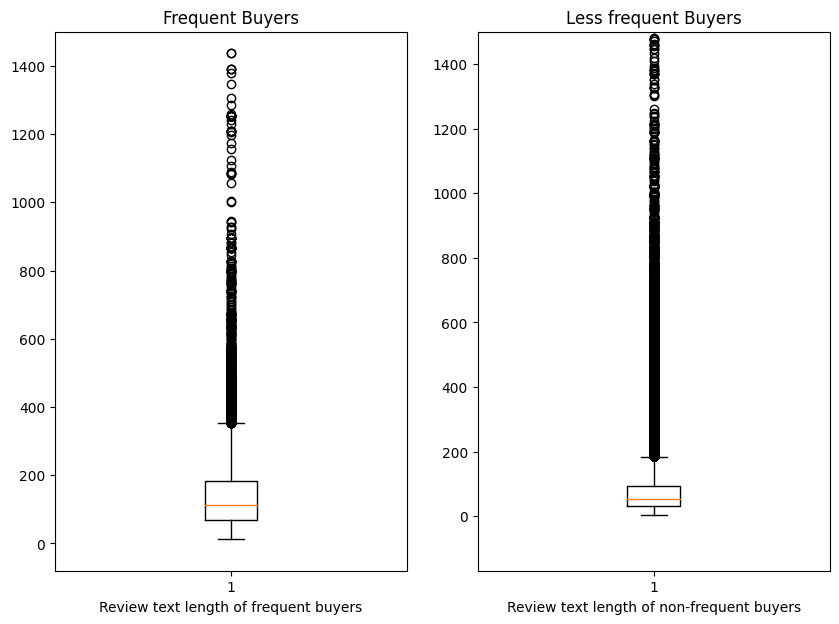

In [62]:
plt.figure(figsize = (10,7))

plt.subplot(121)
plt.boxplot(data = freq_data, x = freq_data['Text_length'])
plt.xlabel("Review text length of frequent buyers")
plt.title("Frequent Buyers")
plt.ylim(top = 1500)

plt.subplot(122)
plt.boxplot(data = non_freq_data, x = non_freq_data['Text_length'])
plt.xlabel("Review text length of non-frequent buyers")
plt.title("Less frequent Buyers")
plt.ylim(top = 1500)

plt.show()

Frequent Buyers: Show a more spread-out distribution, indicating a tendency to write longer reviews. They also have a higher median review length.

Less Frequent Buyers: Have a more condensed distribution, writing shorter reviews on average. They also have a lower median review length.
